In [89]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.quantum_info.operators import Operator, Pauli
import math

# Create a quantum circuit with five qbits and five classical registers
qreg = QuantumRegister(5, 'q')
creg = ClassicalRegister(5, 'c')
qc = QuantumCircuit(qreg, creg)

# Define the Psi one state |Psi_1> = |0>
psi_one = [1, 0]

# Define the Psi two state |Psi_2> = c|0> + sqrt(1-c²)|1>
c = 0.4
psi_two = [c, math.sqrt(1-c**2)]

# Apply initialisation operation depending on the experiment to test
# Experiment 1: |Psi_1>|Psi_1>|Psi_1>|Psi_1>|Psi_1>
# Experiment 2: |Psi_2>|Psi_1>|Psi_1>|Psi_1>|Psi_1>
# Experiment 3: |Psi_2>|Psi_2>|Psi_1>|Psi_1>|Psi_1>
# Experiment 4: |Psi_2>|Psi_2>|Psi_2>|Psi_1>|Psi_1>
# Experiment 5: |Psi_2>|Psi_2>|Psi_2>|Psi_2>|Psi_1>

# Experiment 3:
qc.initialize(psi_two, 0)
qc.initialize(psi_two, 1)
qc.initialize(psi_one, 2)
qc.initialize(psi_one, 3)
qc.initialize(psi_one, 4)

qc.draw()

┌─────────────────────────┐
q_0: ┤ initialize(0.4,0.91652) ├
     ├─────────────────────────┤
q_1: ┤ initialize(0.4,0.91652) ├
     └───┬─────────────────┬───┘
q_2: ────┤ initialize(1,0) ├────
         ├─────────────────┤    
q_3: ────┤ initialize(1,0) ├────
         ├─────────────────┤    
q_4: ────┤ initialize(1,0) ├────
         └─────────────────┘    
c: 5/═══════════════════════════

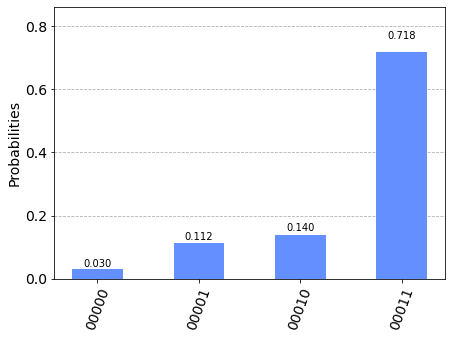

In [90]:
from qiskit.visualization import plot_histogram

# Simulate circuit using the QASM Simulator
backend = Aer.get_backend('qasm_simulator')

# Measure mapping quantum bits to classical registers
qc.measure(qreg, creg)

# Execute 1000 times the circuit using the QASM simulator and get the counts
counts = execute(qc, backend, shots=1000).result().get_counts(qc)

plot_histogram(counts)